# ***Step by step tutorial is shown in PPT***

# **2. Exercise**


mount google drive to colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


create a new directory (e.g., Data_folder) in your drive and change directory into it

創建一個新的檔案路徑名稱，建議不要跟 Example2.ipynb 一樣，否則資料會混在一起

In [3]:
%cd "/content/gdrive/MyDrive"
!mkdir HW_YOLOv3
%cd "/content/gdrive/MyDrive/HW_YOLOv3"

/content/gdrive/MyDrive
mkdir: cannot create directory ‘HW_YOLOv3’: File exists
/content/gdrive/MyDrive/HW_YOLOv3


clone yolov3 and change directory to yolov3

install dependencies

import externel libraries

print pytorch version and gpu status

In [4]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.5.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=c0c73be2-2db6-bf49-385c-3dd453c76b9d, L2_cache_size=4MB)


change directory to Data_folder

copy fruit.zip from shareddrive to current directory

unzip fruit.zip

In [5]:
%cd "/content/gdrive/MyDrive/HW_YOLOv3"
!cp "/content/gdrive/MyDrive/MachineLearning/week2/DataSet/fruit.zip" ./
!unzip fruit.zip

/content/gdrive/MyDrive/HW_YOLOv3
Archive:  fruit.zip
   creating: fruit/
   creating: fruit/test/
  inflating: fruit/test/apple_77.jpg  
  inflating: fruit/test/apple_77.txt  
  inflating: fruit/test/apple_87.jpg  
  inflating: fruit/test/apple_87.txt  
  inflating: fruit/test/apple_88.jpg  
  inflating: fruit/test/apple_88.txt  
  inflating: fruit/test/apple_89.jpg  
  inflating: fruit/test/apple_89.txt  
  inflating: fruit/test/apple_90.jpg  
  inflating: fruit/test/apple_90.txt  
  inflating: fruit/test/apple_91.jpg  
  inflating: fruit/test/apple_91.txt  
  inflating: fruit/test/apple_93.jpg  
  inflating: fruit/test/apple_93.txt  
  inflating: fruit/test/apple_94.jpg  
  inflating: fruit/test/apple_94.txt  
  inflating: fruit/test/apple_95.jpg  
  inflating: fruit/test/apple_95.txt  
  inflating: fruit/test/banana_77.jpg  
  inflating: fruit/test/banana_77.txt  
  inflating: fruit/test/banana_78.jpg  
  inflating: fruit/test/banana_78.txt  
  inflating: fruit/test/banana_79.jpg  

**Add more fruit images**

label new fruit images by LabelImg.exe

upload new images and labels to Data_folder//fruit//train

請依照 PPT 將 DataSet 改成 fruit 並進行訓練

# Prepare data to train fruit dataset

change directory to Data_folder

create train.txt, valid.txt, test.txt

In [5]:
%cd "/content/gdrive/MyDrive/HW_YOLOv3"
!find "/content/gdrive/MyDrive/HW_YOLOv3/fruit/train" -name "*.jpg" > fruit_train.txt
!find "/content/gdrive/MyDrive/HW_YOLOv3/fruit/valid" -name "*.jpg" > fruit_valid.txt
!find "/content/gdrive/MyDrive/HW_YOLOv3/fruit/test" -name "*.jpg" > fruit_test.txt

/content/gdrive/MyDrive/HW_YOLOv3


# Train fruit dataset with more data

create .yaml file

modify .yaml file

In [7]:
!touch fruit.yaml

copy yolov3.yaml to Data_folder

modify yolov3.yaml

In [9]:
cp "/content/gdrive/MyDrive/My_ML_Data/yolov3/models/yolov3.yaml" "/content/gdrive/MyDrive/HW_YOLOv3"

# Start training

In [6]:
%cd "/content/gdrive/MyDrive/HW_YOLOv3/yolov3"

!python train.py --img 320 --batch 50 --epochs 100 \
--data "/content/gdrive/MyDrive/HW_YOLOv3/fruit.yaml" \
--weights "/content/gdrive/MyDrive/MachineLearning/week2/PreTrainWeight/yolov3.pt" \
--cfg "/content/gdrive/MyDrive/HW_YOLOv3/yolov3.yaml" \
--project "/content/gdrive/MyDrive/HW_YOLOv3/train"

/content/gdrive/MyDrive/HW_YOLOv3/yolov3
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-10 08:15:23.353585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 08:15:23.372419: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 08:15:23.378231: E external/local_xla/xla/stream_execut

import plot_results

plot results

show results

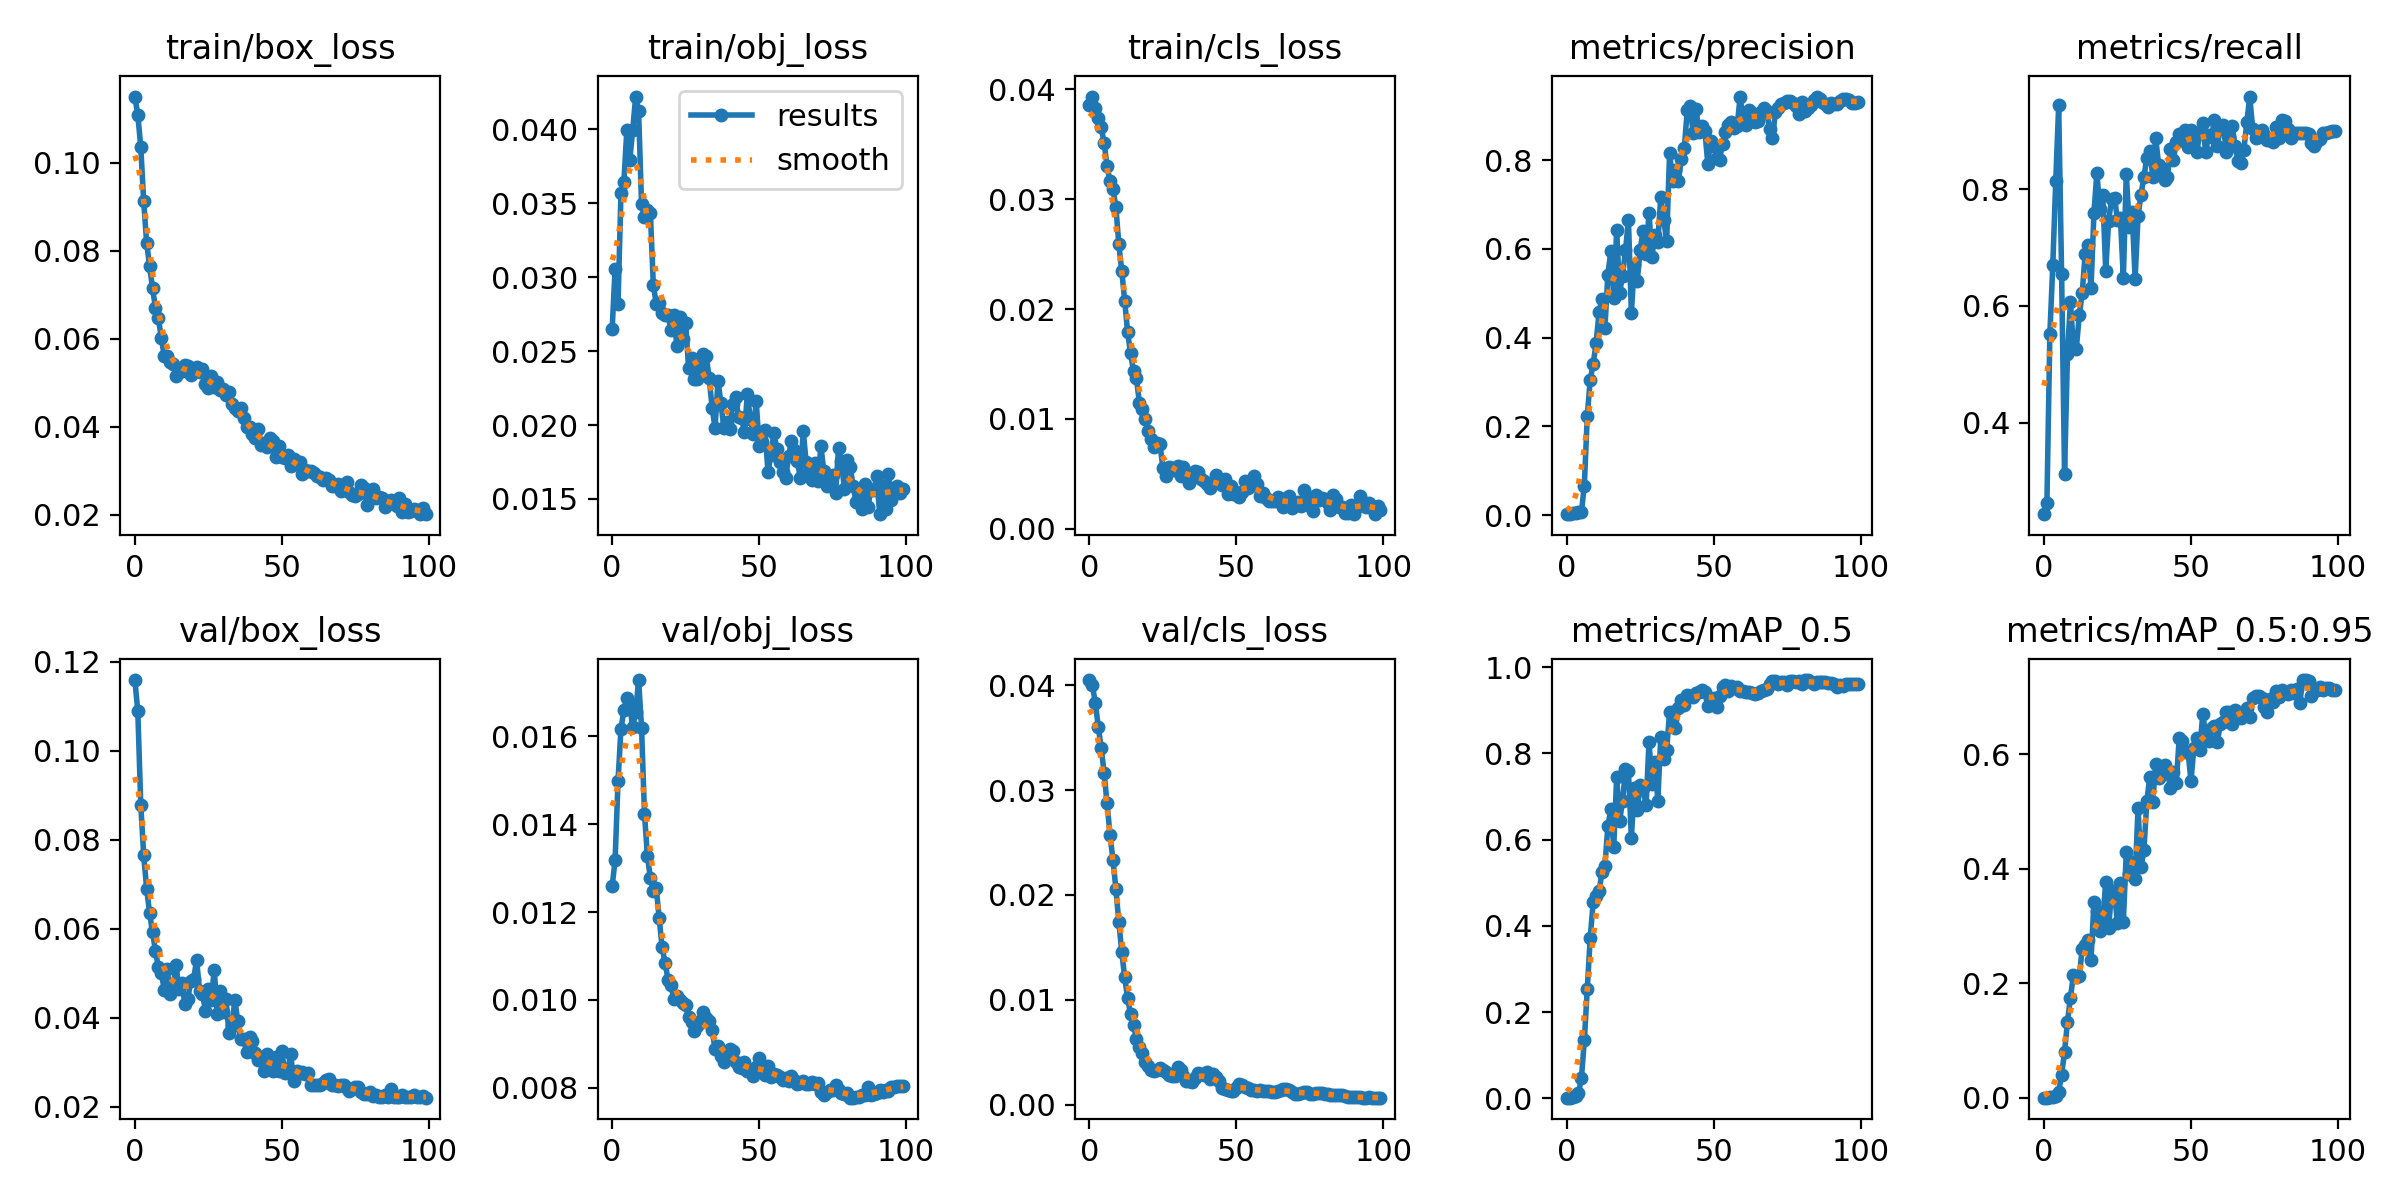

In [7]:
from utils.plots import plot_results
plot_results('/content/gdrive/MyDrive/HW_YOLOv3/train/exp/results.csv')
Image(filename='/content/gdrive/MyDrive/HW_YOLOv3/train/exp/results.png', width=800)

run detect.py

In [8]:
!python detect.py --iou-thres 0.5 --conf-thres 0.5 --img-size 320 \
--source "/content/gdrive/MyDrive/HW_YOLOv3/fruit/test" \
--weights "/content/gdrive/MyDrive/HW_YOLOv3/train/exp/weights/best.pt" \
--project "/content/gdrive/MyDrive/HW_YOLOv3/detect"

detect: weights=['/content/gdrive/MyDrive/HW_YOLOv3/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/HW_YOLOv3/fruit/test, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/gdrive/MyDrive/HW_YOLOv3/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-244-g549240bf Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov3 summary: 190 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
image 1/30 /content/gdrive/MyDrive/HW_YOLOv3/fruit/test/apple_77.jpg: 256x320 5 apples, 29.3ms
image 2/30 /content/gdrive/MyDrive/HW_YOLOv3/fruit/test/apple_87.jpg: 320x320 1 apple, 25.7ms
image 3/30 /content/gdrive/MyDrive/HW_YOLOv3/fruit/test/apple_88.jpg: 

show one detected image

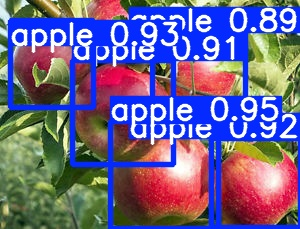

In [9]:
Image(filename='/content/gdrive/MyDrive/HW_YOLOv3/detect/exp/apple_77.jpg', width=800)

run val.py

In [10]:
!python val.py --iou-thres 0.5 --conf-thres 0.5 --img-size 320 \
--data "/content/gdrive/MyDrive/HW_YOLOv3/fruit.yaml" \
--weights "/content/gdrive/MyDrive/HW_YOLOv3/train/exp/weights/best.pt" \
--project "/content/gdrive/MyDrive/HW_YOLOv3/valid"

val: data=/content/gdrive/MyDrive/HW_YOLOv3/fruit.yaml, weights=['/content/gdrive/MyDrive/HW_YOLOv3/train/exp/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.5, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/gdrive/MyDrive/HW_YOLOv3/valid, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.5 > 0.001 produces invalid results
YOLOv3 🚀 v9.6.0-244-g549240bf Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov3 summary: 190 layers, 61508200 parameters, 0 gradients, 154.6 GFLOPs
val: Scanning /content/gdrive/MyDrive/HW_YOLOv3/fruit_valid.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:03<00:00,  1.88s/it]
                   all         50         95 

show confusion matrix

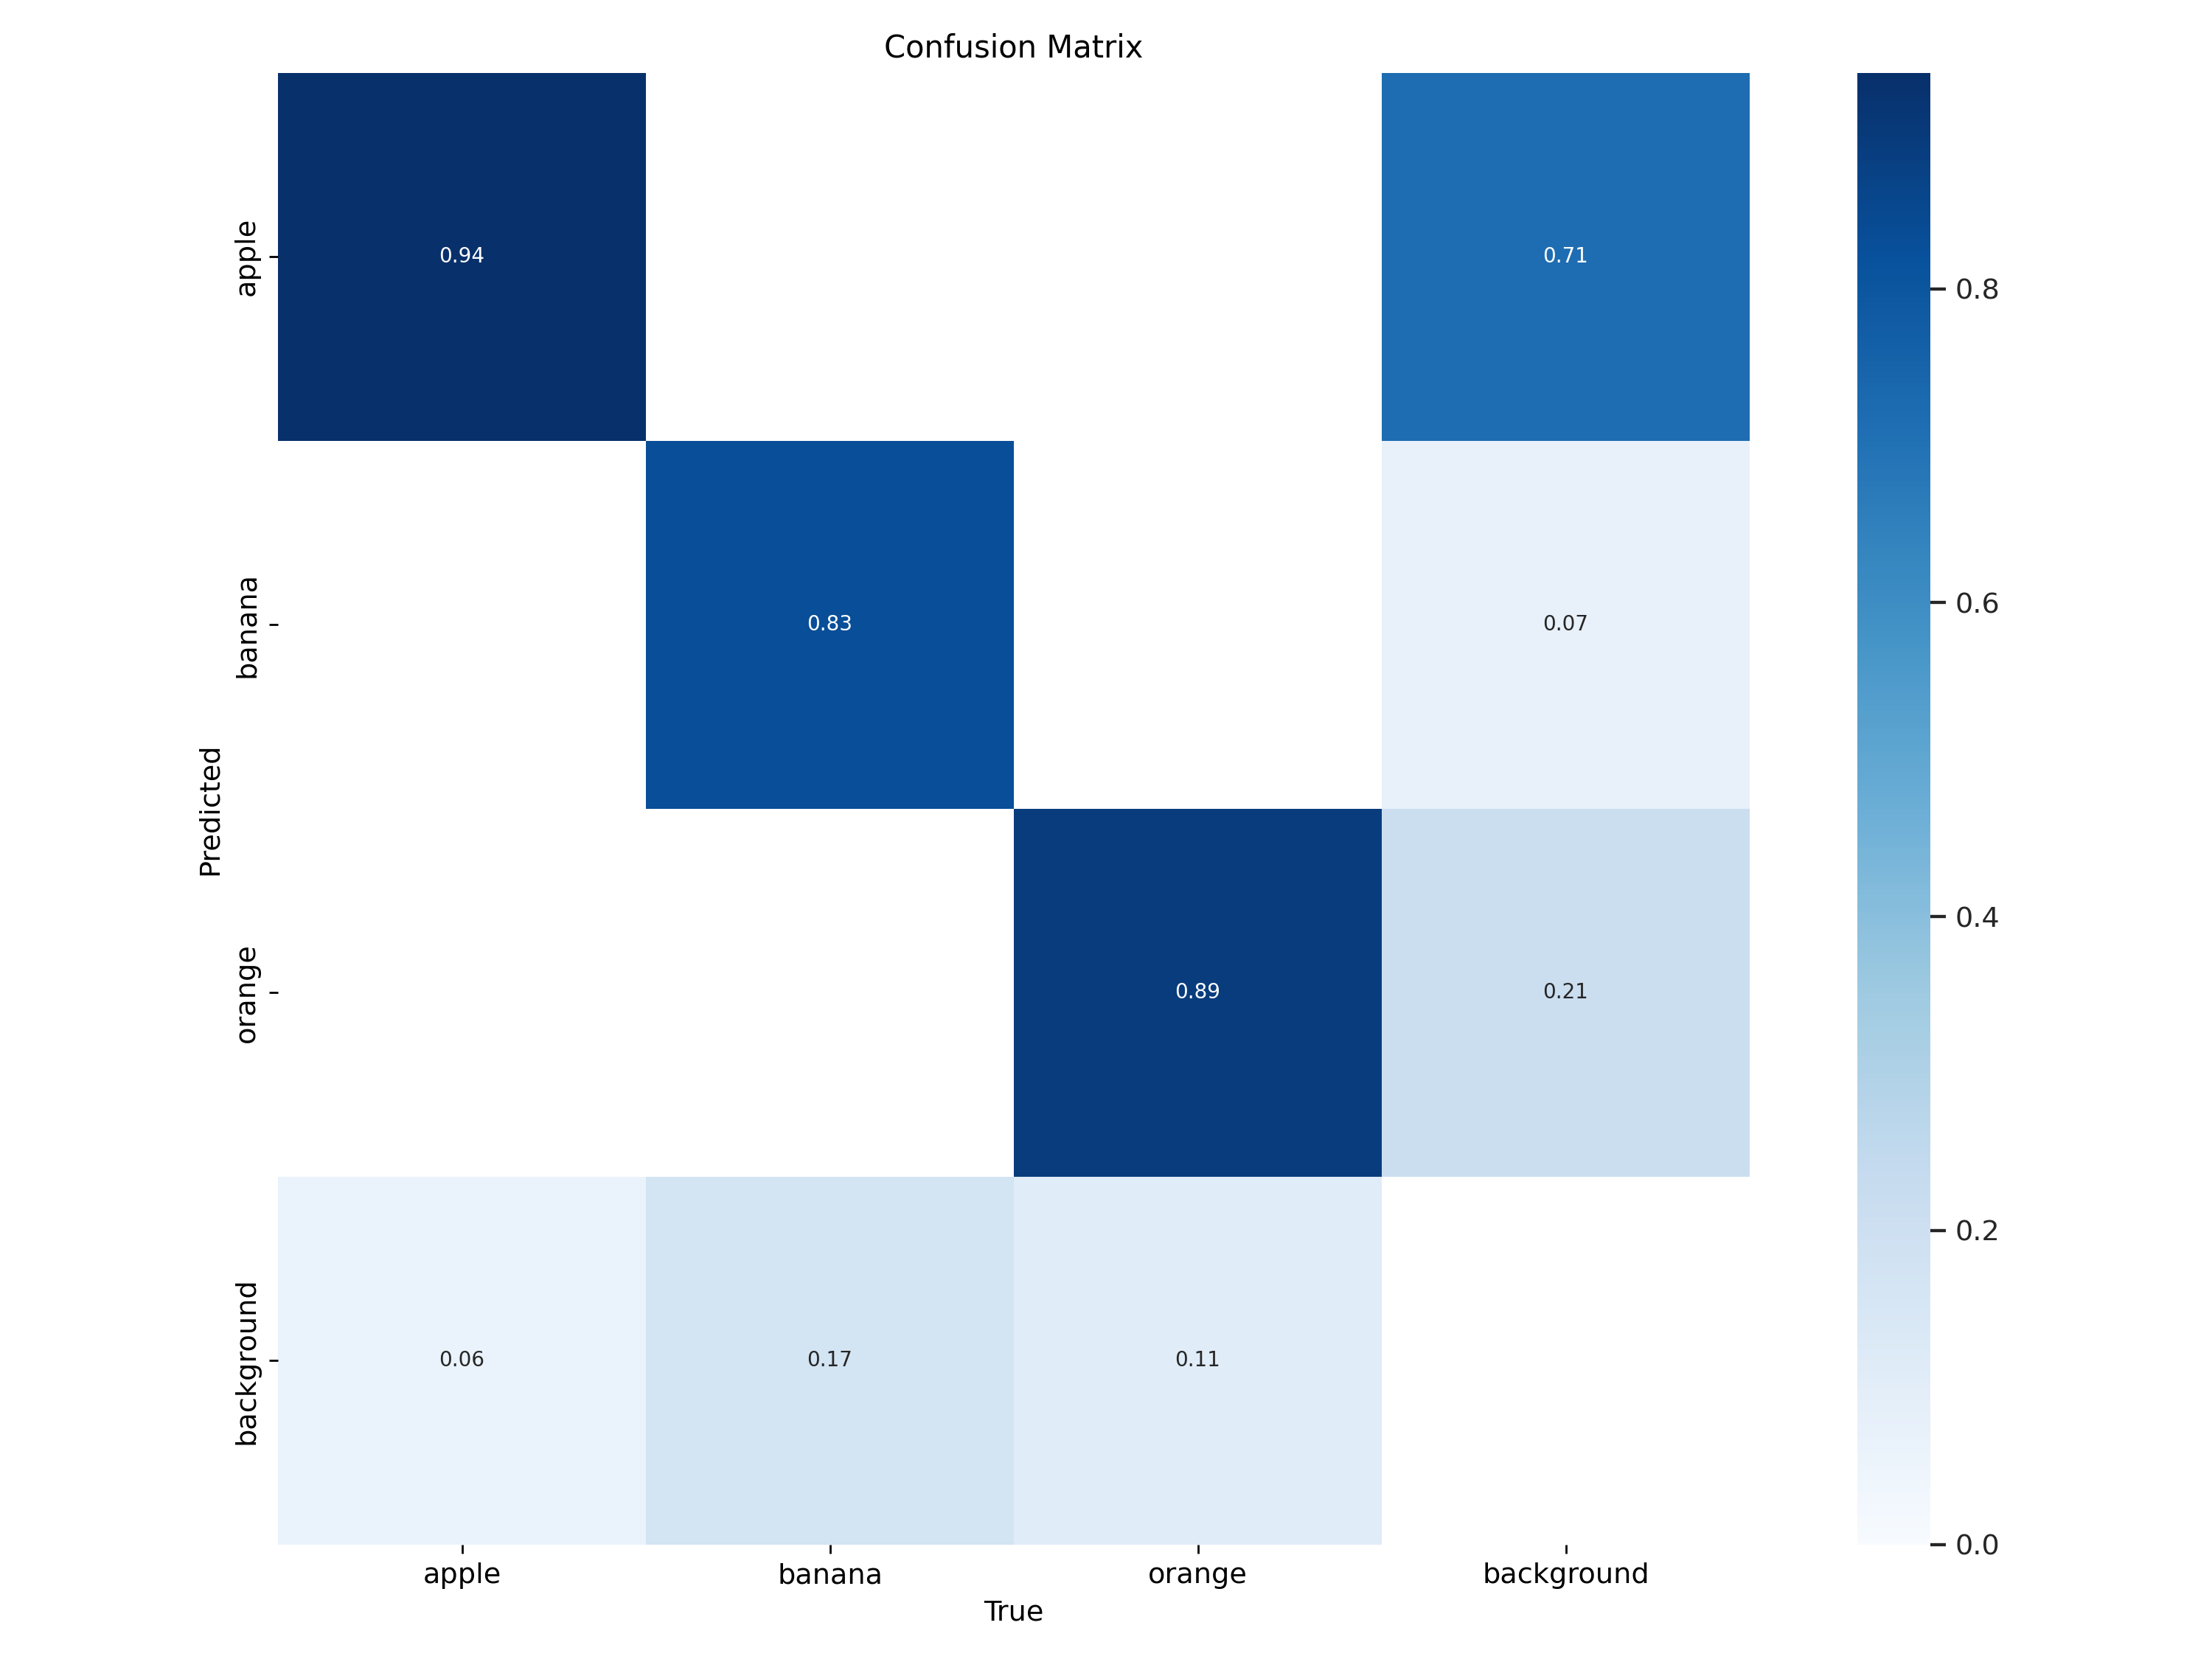

In [11]:
Image(filename='/content/gdrive/MyDrive/HW_YOLOv3/valid/exp/confusion_matrix.png', width=800)

show PR curve

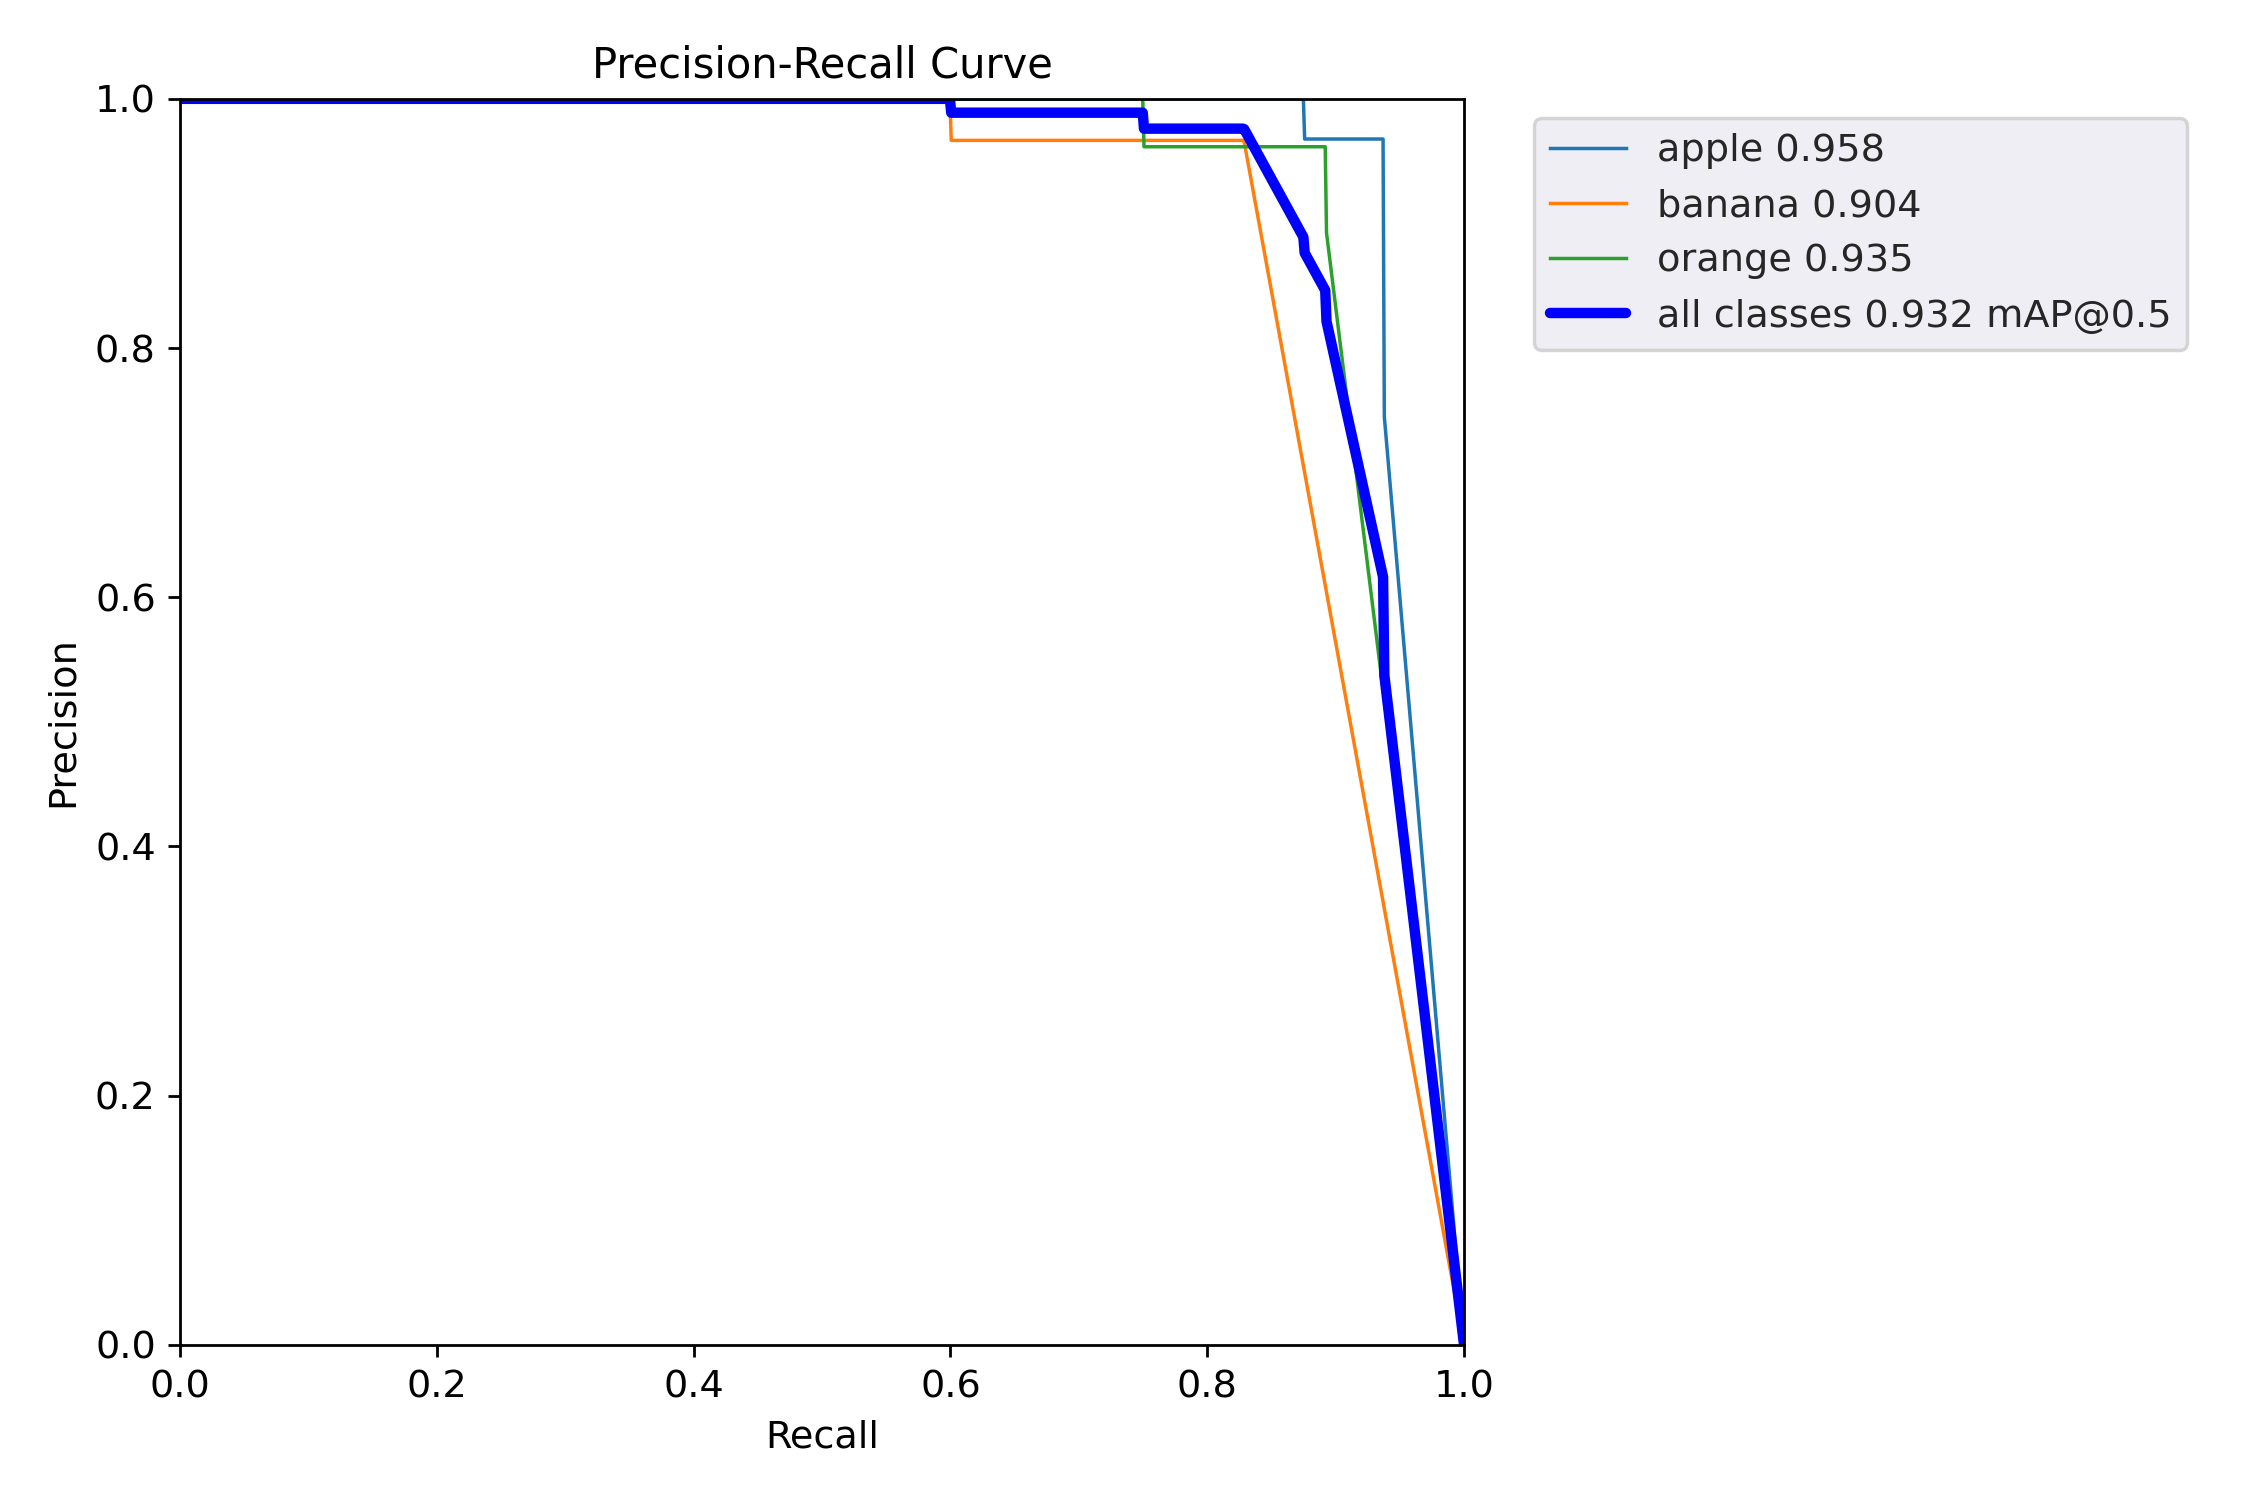

In [12]:
Image(filename='/content/gdrive/MyDrive/HW_YOLOv3/valid/exp/PR_curve.png', width=800)

show one test batch label

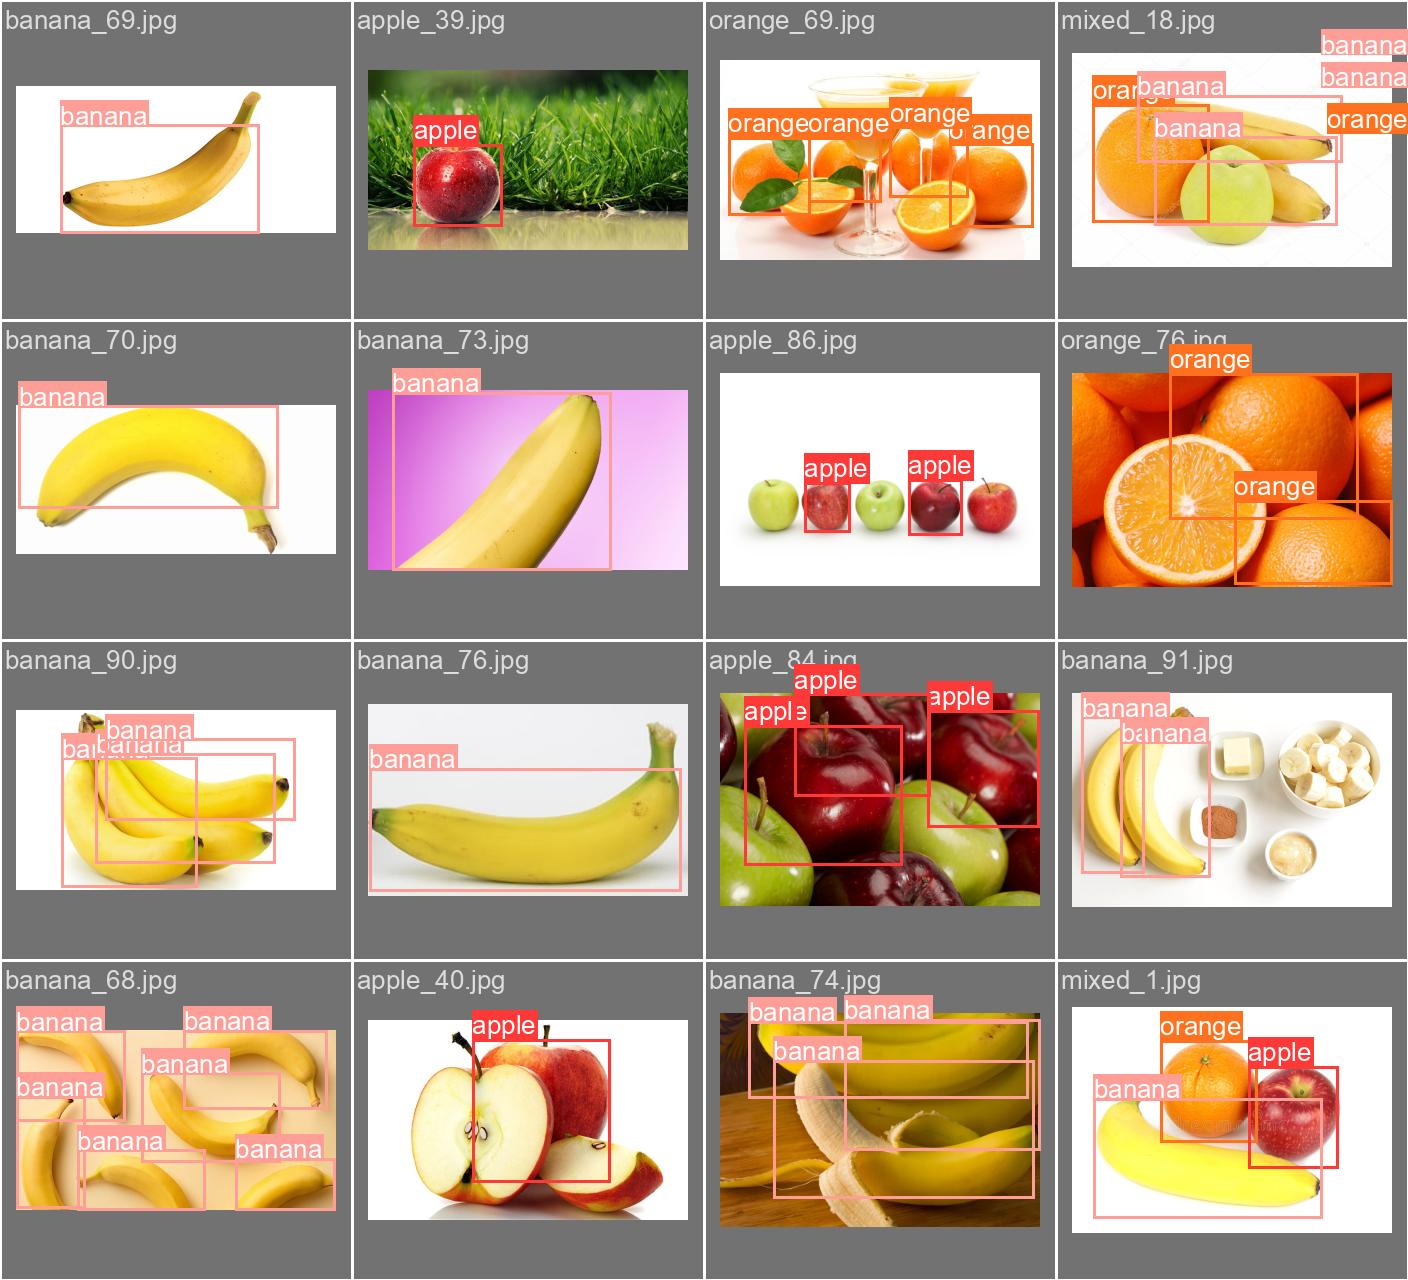

In [16]:
Image(filename='/content/gdrive/MyDrive/HW_YOLOv3/valid/exp/val_batch0_labels.jpg', width=800)

show one corrosponding test batch predict

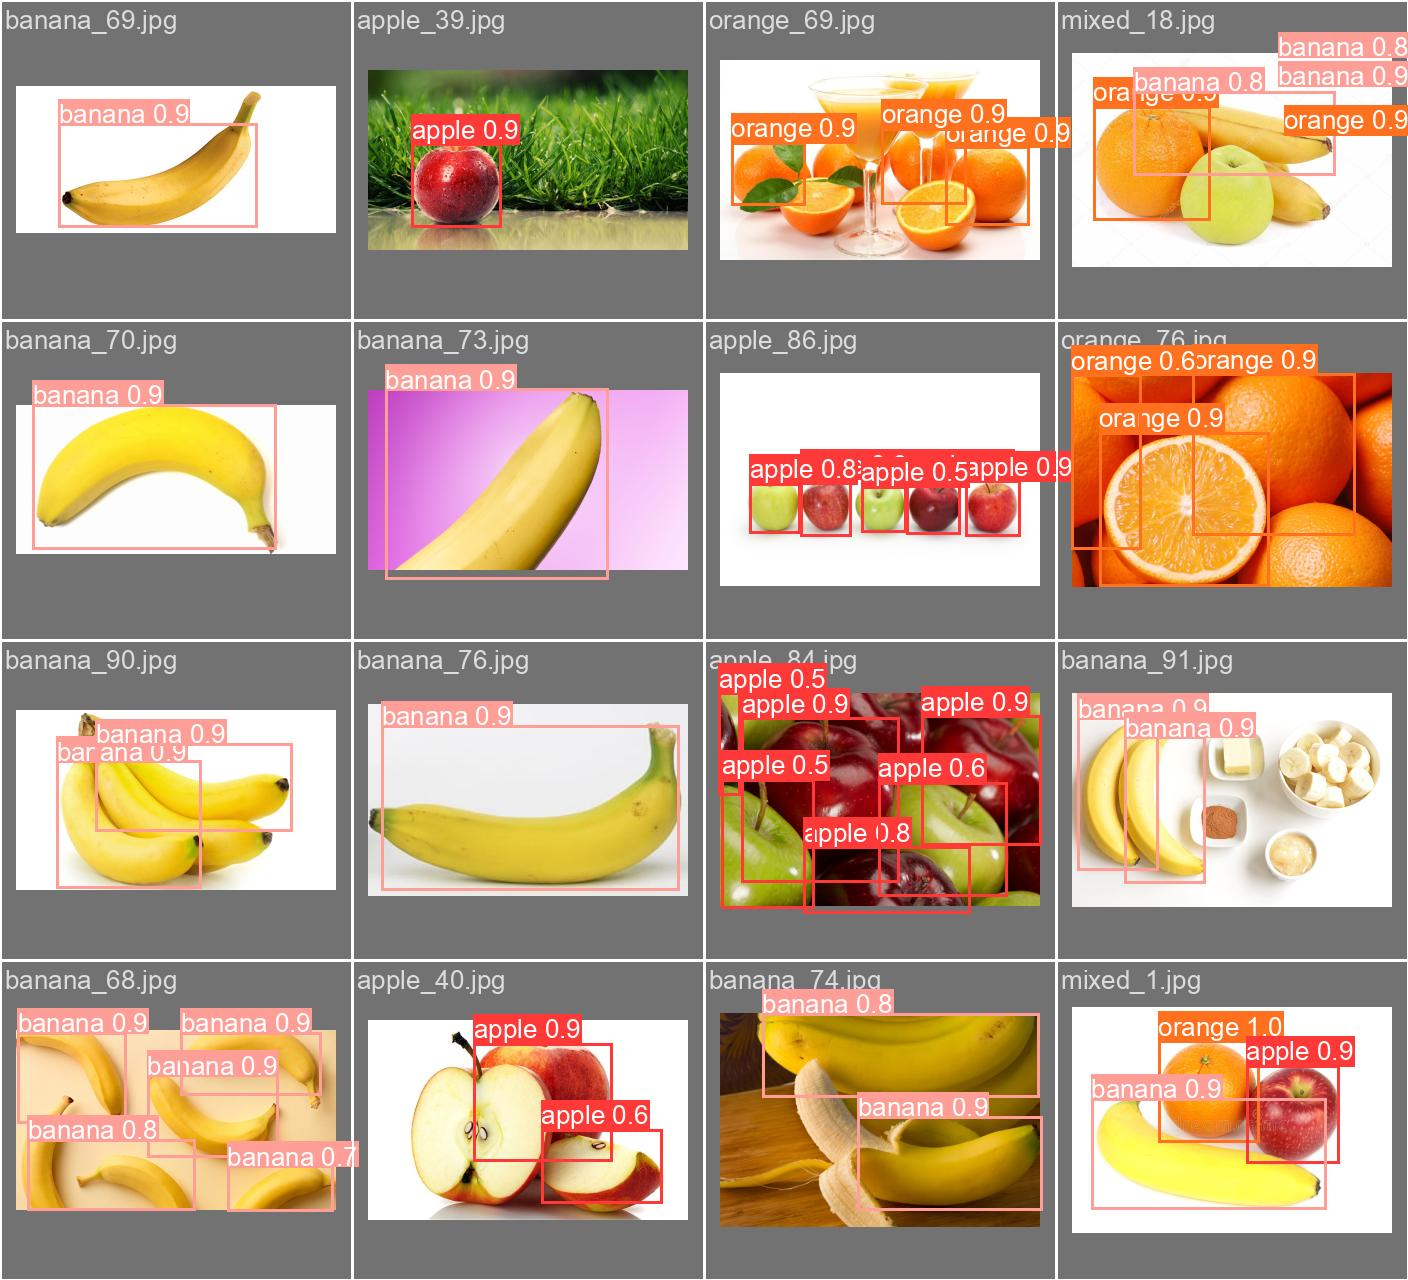

In [17]:
Image(filename='/content/gdrive/MyDrive/HW_YOLOv3/valid/exp/val_batch0_pred.jpg', width=800)